<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [672]:
!pip install cufflinks

In [673]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# plotly packages
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

## Data Gathering and  Preparation

In [674]:
df = pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [676]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [677]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
TVS Wego                     1
Honda Dream Yuga             1
Bajaj Avenger 150 street     1
ignis                        1
KTM RC390                    1
Name: Car_Name, Length: 98, dtype: int64

In [678]:
df.drop(columns="Car_Name", inplace=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [679]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [680]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [681]:
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [682]:
df["Age"] = 2021 - df["Year"]
df.drop(columns=["Year"], inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [683]:
df.iplot(kind="hist",subplots=True);

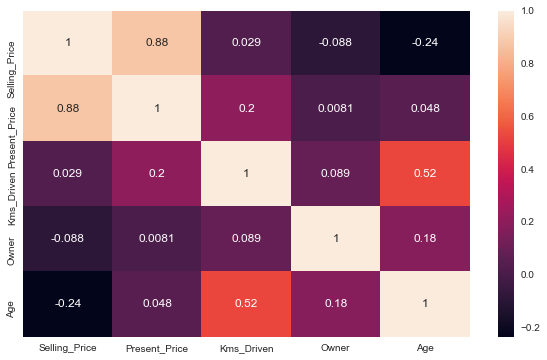

In [684]:
sns.heatmap(df.corr(), annot = True);

## Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>

In [685]:
df2 = pd.get_dummies(df)
df2

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,6,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,12,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,4,0,1,0,1,0,0,1


In [686]:
from scipy.stats import skew
for i in df2.drop(columns = "Selling_Price").columns:
    print(i, skew(df2[i]))

Present_Price 4.062773999428537
Kms_Driven 6.403895025283172
Owner 7.578839290299513
Age 1.239970249484663
Fuel_Type_CNG 12.14523317862652
Fuel_Type_Diesel 1.5052007581277407
Fuel_Type_Petrol -1.4540470885149632
Seller_Type_Dealer -0.6190415051506463
Seller_Type_Individual 0.6190415051506463
Transmission_Automatic 2.1629278085458243
Transmission_Manual -2.1629278085458243


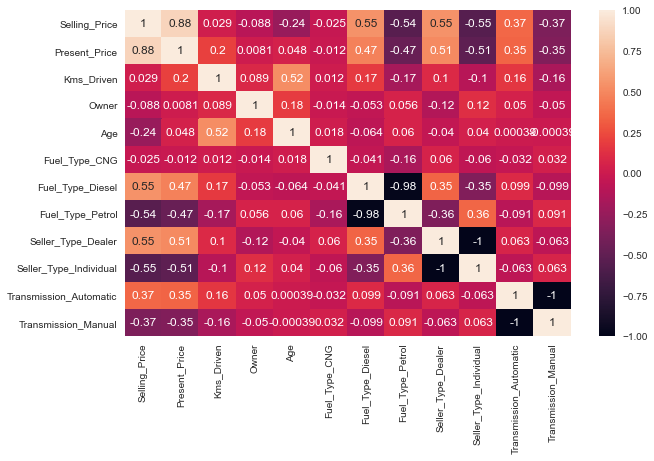

In [687]:
sns.heatmap(df2.corr(), annot = True);

### Features and target variable

In [688]:
X = df2.drop(columns = "Selling_Price") 

y = df2["Selling_Price"]

### Splitting data into training and testing

In [689]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [690]:
df2.sample(15)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
238,4.80,9.40,60241,0,8,0,0,1,1,0,0,1
276,8.65,13.60,24800,0,6,0,0,1,1,0,0,1
220,3.50,4.43,38488,0,4,0,0,1,1,0,0,1
296,9.50,11.60,33988,0,5,0,1,0,1,0,0,1
68,4.35,13.74,88000,0,10,0,0,1,1,0,0,1
272,7.50,10.00,27600,0,6,0,0,1,1,0,0,1
147,0.55,0.84,58000,0,6,0,0,1,0,1,0,1
96,20.75,25.39,29000,0,5,0,1,0,1,0,1,0
245,5.20,9.40,71000,0,9,0,1,0,1,0,0,1
165,0.45,0.54,500,0,5,0,0,1,0,1,1,0


## Scaling the Data

In [691]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [692]:
scaler.fit(X_train)

StandardScaler()

In [693]:
X_train = scaler.transform(X_train)
X_train

array([[ 0.17438135,  0.15682236, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615],
       [-0.71559985, -0.81946354, -0.19900744, ...,  1.32783956,
        -0.40027615,  0.40027615],
       [-0.20274688, -0.60582921, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615],
       ...,
       [ 0.60952932,  0.45545099, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615],
       [ 2.91166929,  0.24870809, -0.19900744, ..., -0.75310303,
         2.49827527, -2.49827527],
       [ 0.26141095,  0.34059383, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615]])

In [694]:
X_test = scaler.transform(X_test)
X_test

array([[-0.70523918, -0.14180627, -0.19900744, ...,  1.32783956,
        -0.40027615,  0.40027615],
       [ 0.21167975,  0.27167953, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615],
       [ 0.21582402, -0.48637776, -0.19900744, ..., -0.75310303,
         2.49827527, -2.49827527],
       ...,
       [ 1.10684129,  0.31762239, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615],
       [-0.57780299,  2.08642273, -0.19900744, ...,  1.32783956,
        -0.40027615,  0.40027615],
       [ 0.0210435 ,  0.20276523, -0.19900744, ..., -0.75310303,
        -0.40027615,  0.40027615]])

In [695]:
pd.DataFrame(X_train).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [696]:
pd.DataFrame(X_test).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


##  Model Building (Linear Regression)

In [697]:
from sklearn.linear_model import LinearRegression

In [698]:
model = LinearRegression()

In [699]:
model.fit(X_train, y_train)

LinearRegression()

In [700]:
y_pred = model.predict(X_test)
y_pred

array([-0.90070593,  7.77500716,  8.36389549,  8.64729313,  0.69565883,
        6.94928011,  7.09538243,  8.2082706 ,  0.71712278,  6.89948677,
        5.33968638,  0.12074333, -3.99219714,  3.20525641, 11.26044106,
        4.26623991,  6.5053664 ,  1.33781786,  2.93795994,  8.16692445,
        4.33066469,  3.04420116,  6.06405056,  9.101721  , -0.07738056,
        5.73108181,  0.80190445,  4.39315677,  5.20139446,  4.49311576,
        2.63684069, 10.37407168,  0.51562323,  8.19866452,  4.39719761,
       -0.88029077,  2.93725358, -3.05656534,  6.78737527, -0.38745444,
        1.91806218,  4.44551414,  8.85176131, 10.56264763,  0.88667445,
        4.9427124 , -3.63471273,  7.74214874,  6.31999206,  9.54232935,
        6.52724508,  1.38384388,  7.19039576, -2.49262566,  5.20202423,
        5.72221346,  0.84154705,  2.46329663,  7.39740581,  7.72654999,
       -2.55690117,  9.45671838,  1.74972802,  7.84378867,  7.810935  ,
        7.10847696, 11.37828282,  0.38531534,  6.01200325,  6.92

In [701]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [702]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
176,0.35,-0.900706,1.250706
253,7.20,7.775007,-0.575007
12,7.50,8.363895,-0.863895
16,7.25,8.647293,-1.397293
193,0.20,0.695659,-0.495659
...,...,...,...
183,0.27,-0.183623,0.453623
119,1.05,0.503841,0.546159
57,4.75,7.415091,-2.665091
37,0.35,-4.530950,4.880950


In [703]:
result_sample = comparing.head(25)

result_sample

,Actual,pred,residual
176,0.35,-0.900706,1.250706
253,7.20,7.775007,-0.575007
12,7.50,8.363895,-0.863895
16,7.25,8.647293,-1.397293
193,0.20,0.695659,-0.495659
252,5.40,6.949280,-1.549280
244,5.95,7.095382,-1.145382
285,7.40,8.208271,-0.808271
147,0.55,0.717123,-0.167123
231,9.25,6.899487,2.350513


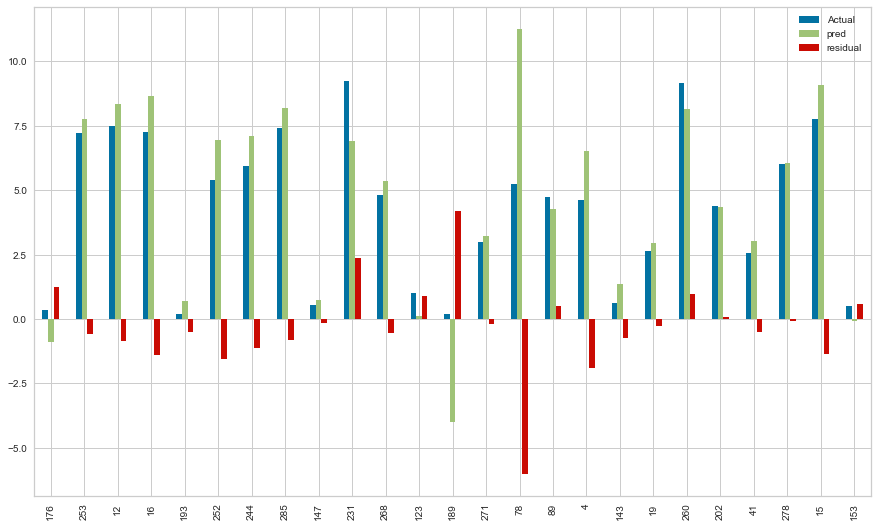

In [704]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show();

## Error metrics

In [705]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [706]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.6175884683565981

In [707]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [708]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6175884683565981
MAE 		: 1.374969301087297
MSE 		: 3.794586126923812
RMSE 		: 1.947969744868696


In [709]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,2.450534,1.947970
mae,1.598557,1.374969
mse,6.005118,3.794586
R2,0.814317,0.617588


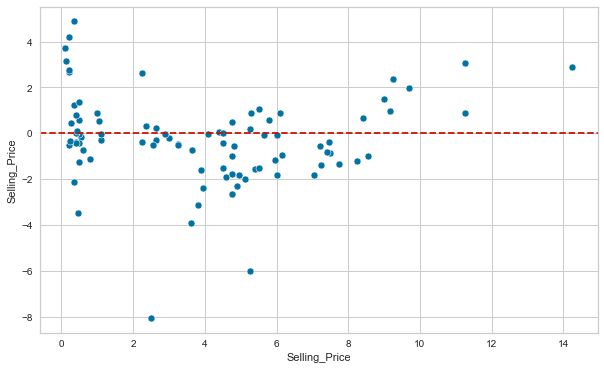

In [710]:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show();

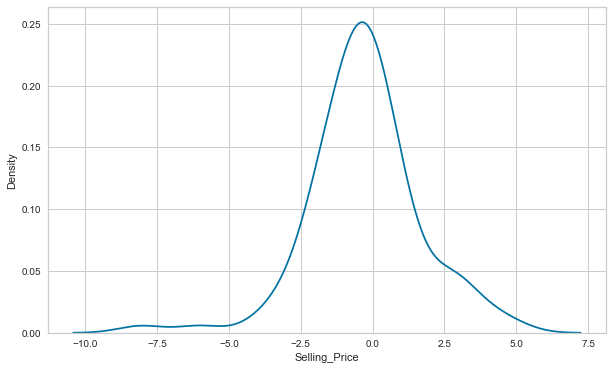

In [711]:
sns.kdeplot(residuals);

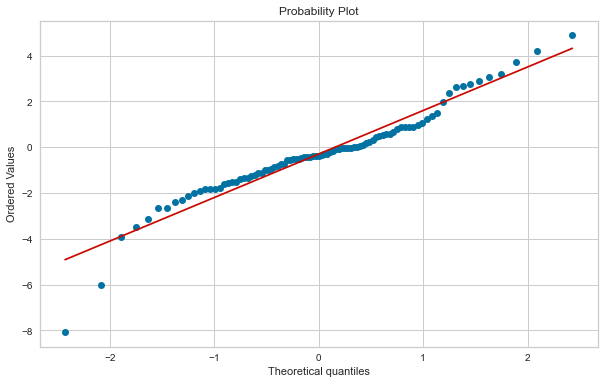

In [712]:
stats.probplot(residuals, dist="norm", plot=plt);

In [713]:
from yellowbrick.regressor import PredictionError

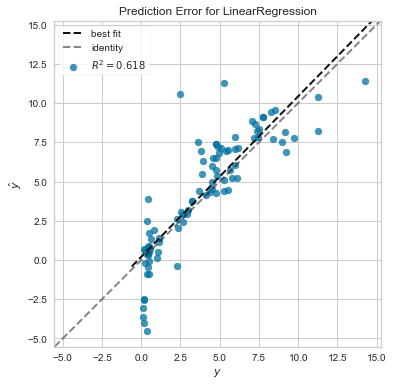

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [714]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Interpret the model

# Model Evaluation

**************************************

# Regularization

# Ridge

In [715]:
from sklearn.linear_model import Ridge

In [716]:
ridge_model = Ridge(alpha=1)

In [717]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [718]:
y_pred = ridge_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6185551675348014
MAE 		: 1.378345048135011
MSE 		: 3.7849937820623616
RMSE 		: 1.9455060478092485


In [719]:
y_train_pred = ridge_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9058669553858645
MAE 		: 1.2035541076400957
MSE 		: 3.0443318038625935
RMSE 		: 1.7448013651595398


In [720]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.744801,1.945506
mae,1.203554,1.378345
mse,3.044332,3.784994
R2,0.905867,0.618555


In [721]:
#choosing alpha 
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import RidgeCV

In [722]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [723]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.791996,-0.871486,-1.175410,-1.084163
2,0.869054,-1.498893,-8.060781,-2.839151
3,0.882160,-2.000694,-5.863922,-2.421554
4,0.835536,-1.286206,-3.571948,-1.889960
5,0.868846,-1.401233,-2.663509,-1.632026
6,0.738462,-1.446310,-6.711469,-2.590650
7,0.826301,-1.094450,-1.802424,-1.342544
8,0.813197,-1.612112,-9.904610,-3.147159
9,0.947191,-0.816818,-0.955266,-0.977377
10,0.957097,-1.052233,-1.584595,-1.258807


In [724]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space         

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [725]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [726]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [727]:
ridge_cv_model.alpha_

1.0

In [728]:
y_pred = ridge_cv_model.predict(X_test)

In [729]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6185551675348014
MAE 		: 1.378345048135011
MSE 		: 3.7849937820623616
RMSE 		: 1.9455060478092485


In [730]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metric(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9058669553858645
MAE 		: 1.2035541076400957
MSE 		: 3.0443318038625935
RMSE 		: 1.7448013651595398


In [731]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.744801,1.945506
mae,1.203554,1.378345
mse,3.044332,3.784994
R2,0.905867,0.618555


# Lasso

In [732]:
from sklearn.linear_model import Lasso, LassoCV

In [733]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [734]:
y_train_pred = lasso_model.predict(X_train)

In [735]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8106317117973157
MAE 		: 1.6539651210546638
MSE 		: 6.124309532126603
RMSE 		: 2.474734234645531


In [736]:
y_pred = lasso_model.predict(X_test)

In [737]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6676662738658581
MAE 		: 1.3734758580868935
MSE 		: 3.297674997608223
RMSE 		: 1.815950163855887


In [738]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.474734,1.815950
mae,1.653965,1.373476
mse,6.124310,3.297675
R2,0.810632,0.667666


## Elastic-Net 

In [739]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [740]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [741]:
elastic_model.l1_ratio

0.5

In [742]:
elastic_model.alpha

1.0

In [743]:
y_train_pred = elastic_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7976744180055282
MAE 		: 1.621925195436095
MSE 		: 6.543357930529373
RMSE 		: 2.5579988136293914


In [744]:
y_pred = elastic_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6308887533831233
MAE 		: 1.4508041541849468
MSE 		: 3.662610302792945
RMSE 		: 1.913794738939614


In [745]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,2.557999,1.913795
mae,1.621925,1.450804
mse,6.543358,3.662610
R2,0.797674,0.630889
